In [1]:
import warnings 
warnings.filterwarnings('ignore')
from IPython.display import Image

데이터 회득

In [2]:
import pandas as pd
basketball_df = pd.read_csv('./Data/basketball_stat.csv')
basketball_df

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5
...,...,...,...,...,...,...,...,...
95,Nikola Vucevic,C,0.3,6.1,10.4,2.8,1.0,1.0
96,Dwyane Wade,SG,0.8,6.2,4.5,3.8,1.4,0.7
97,Dion Waiters,SG,1.8,4.3,3.3,4.3,0.9,0.4
98,Hassan Whiteside,C,0.0,7.0,14.1,0.7,0.7,2.1


In [3]:
print(basketball_df.shape)
print()
print(basketball_df.info())
print()
print(basketball_df.columns)


(100, 8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  100 non-null    object 
 1   Pos     100 non-null    object 
 2   3P      100 non-null    float64
 3   2P      100 non-null    float64
 4   TRB     100 non-null    float64
 5   AST     100 non-null    float64
 6   STL     100 non-null    float64
 7   BLK     100 non-null    float64
dtypes: float64(6), object(2)
memory usage: 6.4+ KB
None

Index(['Player', 'Pos', '3P', '2P', 'TRB', 'AST', 'STL', 'BLK'], dtype='object')


Player    0
Pos       0
3P        0
2P        0
TRB       0
AST       0
STL       0
BLK       0
dtype: int64

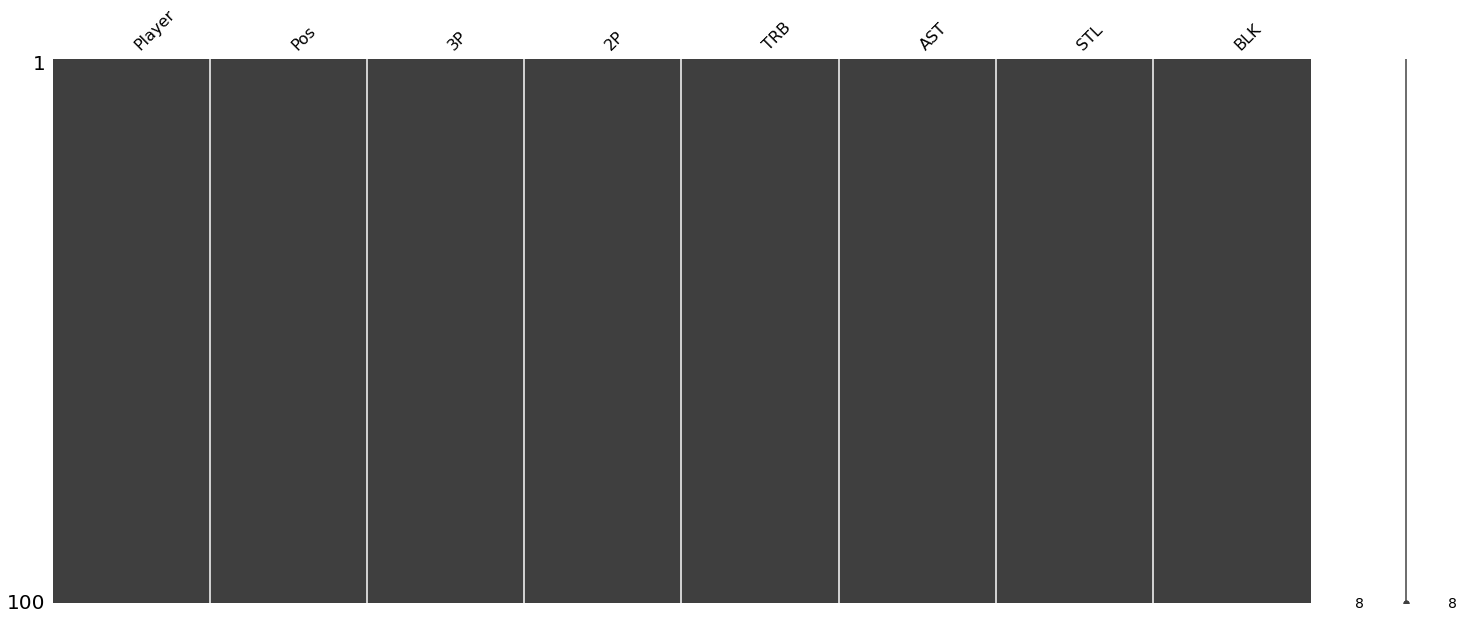

In [4]:
import missingno as msno
msno.matrix(basketball_df)
basketball_df.isnull().sum()
# basketball_df 데이터세트는 NA가 하나도 없는 좋은 데이터이다

In [5]:
basketball_df['Pos'].value_counts()

SG    50
C     50
Name: Pos, dtype: int64

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

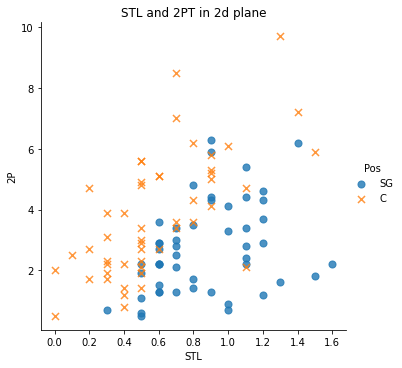

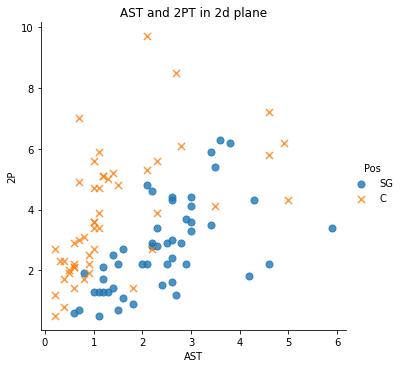

In [7]:
# seaborn 라이브러리의 lmplot() 함수로 스틸과 2점슛, 어시스트와 2점슛의 포지션(Pos) 별 분포도를 출력한다.
sns.lmplot(data = basketball_df, x = 'STL', y = '2P', fit_reg = False, # 데이터, x축, y축, 회귀선 표시 여부
           scatter_kws = {'s': 50},                                     # 그래프에 표시되는 표신의 크기 
           hue = 'Pos',                                                 # 그래프에 표시될 범례별 색상
           markers = ['o', 'x']                                         # hue에 따른 표식의 종류
          )
plt.title('STL and 2PT in 2d plane')
plt.show()

# 어시스트와 2점슛의 포지션 (Pos) 별 분포도를 출력한다
sns.lmplot(data = basketball_df, x = 'AST', y = '2P', fit_reg= False,
          scatter_kws = {'s' : 50},
          hue = "Pos",
          markers = ['o', 'x']
          )
plt.title("AST and 2PT in 2d plane")
plt.show()

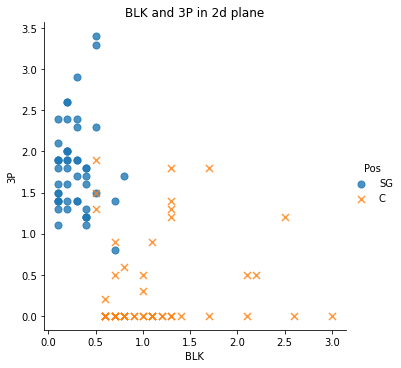

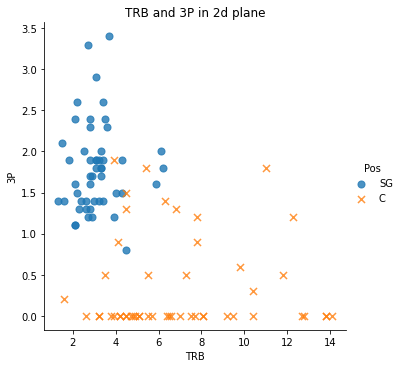

In [8]:
# seaborn 라이브러리의 lmplot() 함수로 블록킹 3점슛, 리바운드와 3점슛의 포지션(Pos) 별 분포도를 출력한다.
sns.lmplot(data = basketball_df, x = 'BLK', y = '3P', fit_reg = False,
          scatter_kws = {'s' : 50}, 
          hue = "Pos",
          markers = ['o', 'x']
          )
plt.title('BLK and 3P in 2d plane')
plt.show()

sns.lmplot(data = basketball_df, x = 'TRB', y = '3P', fit_reg = False,
          scatter_kws = {'s' : 50}, 
          hue = "Pos",
          markers = ['o', 'x']
          )
plt.title('TRB and 3P in 2d plane')
plt.show()

In [9]:
# 판다스의 drop() 함수로 불필요한 컬럼 전체를 삭제할 수 있다.
# axis 속성은 생략시 0이 기본값이며 행을 학제하고 1을 쏘면 열을 삭제한다.
# inplace 속성은 False가 기본값이며 함수가 실행된 결과를 데이터에 반영하지 않지만 True를 쏘면 함수가 실행된 결과를 데이터에 
# 반영한다.
basketball_df.drop(['2P', 'AST', 'STL'], axis = 1, inplace = True)
basketball_df

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5
...,...,...,...,...,...
95,Nikola Vucevic,C,0.3,10.4,1.0
96,Dwyane Wade,SG,0.8,4.5,0.7
97,Dion Waiters,SG,1.8,3.3,0.4
98,Hassan Whiteside,C,0.0,14.1,2.1


In [10]:
# 이제 학습을 시킬 것인데 주어진 100개의 데이터로 학습을 시키는 것은 좋은 생각이 아니다.
# 전체 데이터 100개로 학습을 시키면 100개의 데이터에 최적화될 것 이다. 항상 똑같은 데이터로 학습을 시키면
# 그 똑같은 데이터가 입력될때 최적에 성능을 보여주지만 하지만 학습기킨 데이터가 아닌 다른 데이터가 들어오면 성능이 확 줄어든다.
# 이것을 Overfit (과적화)

In [11]:
# 8 : 2 아니면 7 : 3
# 100개의 데이터가 있으면 80개는 학습용 그리고 20개는 테스트용이다.

In [12]:
# 학습 데이터와 테스트 데이터로 데이터를 분리하기 위해 sklearns의 train_test_split() 함수를 import 한다.
from sklearn.model_selection import train_test_split
# 데이터의 80%를 학습용 데이터로 분리하고 20%를 테스트 데이터로 분리한다.
train, test = train_test_split(basketball_df, train_size = 0.8, test_size = 0.2)   # 전체 100프로라 train_size 또는 test_size 만 써도 된다.
print(train.shape[0])  # 데이터가 나눠졌다 # 학습 데이터
print(test.shape[0])  # 테스트 데이터

80
20


최적의 kNN 파라미터를 찾는다 => 홀수

In [13]:
# sklearn의 cross_val_score() 함수의 k-fold validation 교차 검증을 사용해서 kNN 알고리즘의 조절 가능한 단 하나의 변수 k를 찾는다.
# k-fold 교차 검증은 기존 데이터를 k개로 나눠서 k번 정확도를 검사하는 방법이다,
# kNN을 사용하기 위한 라이브러리를 추가한다.
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier


In [14]:
# 최적의 k를 찾기위해 교차 검증을 수행할 k의 범위를 3부터 학습 데이터 개수의 절반까지 지정한다.
k_list = []
for i in range(3, train.shape[0] // 2, 2): # k는 홀수이여야 하기 때문에 2씩 증가시킨다.
    k_list.append(i)
print(k_list)

[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39]


In [15]:
# 각각의 k별 10-fold 교차 검증 결과의 평균을 기억할 빈 리스트를 선언한다.
cross_validation_scores = []
# 학습 데이터에서 학습에 사용할 데이터를 저장한다,
x_train = train[['3P', 'TRB','BLK']]
# 학습 데이터에서 학습 결과로 사용할 데이터를 저장한다. 지도 학습.
y_train = train[['Pos']]

학습 데이터를 10 조각으로 나눠 1조각을 검증 데이터로 사용하고 나머지 9조각을 학습 데이터로 사용해서 1번째 조각부터 10번째 조각까지 1번씩 검증하고 10번의 검증 결과를 10으로 나눈 평균을 검증 결과의 점수로 한다.

In [16]:
# cross_val_score(model, x, y,  scoring=None, cv = None) 
# model: 회귀 분석 모형
# x: data 독립 변수 (independent variable) => 학습 데이터
# y: data 종속 변수 (dependent variable) => 결과
# scoring: 성능 검증에 사용할 매개 변수에 원하는 평가 지표를 지정한다 => 정확도를 의미하는 'accuracy'를 지정한다.
# cv: 교차 검증 생성기 객체 또는 숫자, None이면 KFold(3), 숫자를 지정하면 kFold(숫자)

In [17]:
# 10-fold 교차 검증을 각 k를 대상으로 수행해 검증 결과를 저장한다.
for k in k_list:
    # KNeighborsClassifier() 함수의 n_neighbors 속성에 kNN 모델에서 사용할 이웃의 개수를 지정해 kNN 모델을 만든다.
    knn = KNeighborsClassifier(n_neighbors = k)
    # 학습에 따른 결과(y_train)는 1차원 형태로 저장해야 하므로 ravel() 함수를 사용해서 2차원을 1차원으로 변경해야 한다.
    scores = cross_val_score(knn, x_train, y_train.values.ravel(), scoring ='accuracy', cv = 10)
    cross_validation_scores.append(scores.mean())
print(cross_validation_scores)

[0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.9375, 0.9375, 0.925, 0.9125, 0.9, 0.8875, 0.875, 0.875, 0.8625, 0.85, 0.8625, 0.85]


위에 있는 숫자들은 정확도를 의미한다.     
각 k별로 출력된 정확도가 쉽게 이해되지 않기 때문에 시각화를 통해서 최적의 k를 확인한다.

Text(0, 0.5, 'accuracy')

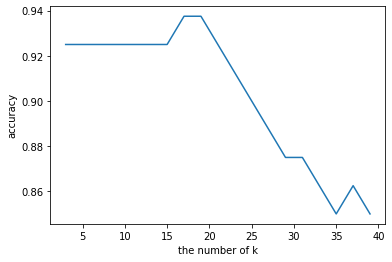

In [18]:
plt.plot(k_list, cross_validation_scores)
plt.xlabel('the number of k') # 'k' in KNN is a parameter that refers to the number of nearest neighbours to include in the majority of the voting process.
plt.ylabel('accuracy')
# 똑같은게 여러게면 맨 앞에있는걸 이용한다.

In [19]:
# 예측율 (accuracy)가 제일 높은 k를 선정한다.
optimal_k = k_list[cross_validation_scores.index(max(cross_validation_scores))]
print('최적의 k: {}'.format(optimal_k))

최적의 k: 17


# 학습 끝
# SUMMARY AND FURTHER EXPLANATION

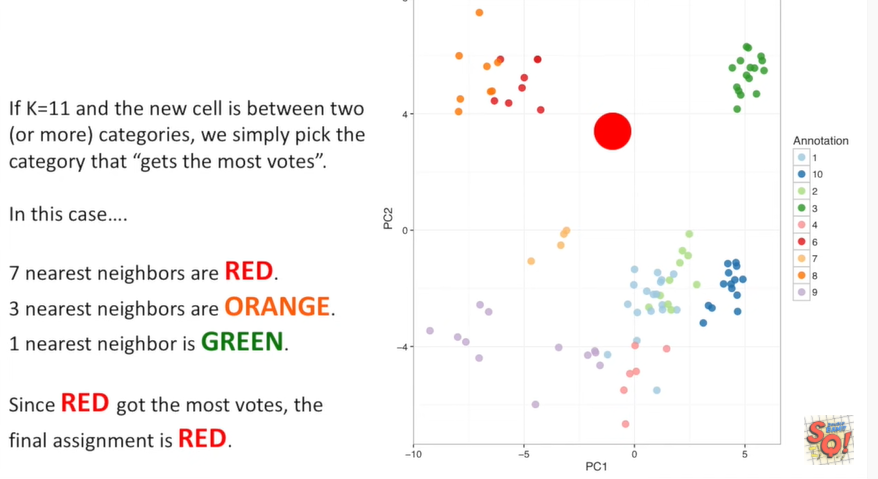

In [20]:
Image('./Image/K-nearest neighbors.jpg')

Please Note: Capital “K” stands for the K value in KNN and lower “k” stands for k value in k-fold cross-validation.

# 모델 테스트 시작

In [22]:
# 분별력이 있다고 판단된 3점슛(3P), 블로킹(BLK), 리바운드(TRB) 속성으로 모델을 학습한 후 테스트를 진행한다.
knn = KNeighborsClassifier(n_neighbors=optimal_k)
# 학습에 사용할 속성과 예측값을 지정한다.
x_train = train[['3P', 'TRB', 'BLK']]
y_train = train[['Pos']]
knn.fit(x_train, y_train.values.ravel())

# 테스트에 사용할 속성과 포지션에 대한 정답을 지정한다.
x_test = test[['3P', 'TRB', 'BLK']]
y_test = test[['Pos']]

from sklearn.metrics import accuracy_score
# 테스트를 수행한다.
predict = knn.predict(x_test)
# 모델 예측 정확도(accuracy)를 출력한다.
print('예측 정확도: {}'.format(accuracy_score(y_test.values.ravel(), predict)))

예측 정확도: 0.85


In [23]:
comparison = pd.DataFrame({'예측값': predict, '실제값': y_test.values.ravel()})
comparison

,예측값,실제값
0,SG,SG
1,SG,C
2,SG,SG
3,SG,SG
4,SG,SG
5,SG,SG
6,SG,SG
7,SG,SG
8,C,C
9,C,SG


In [30]:
x = {"3P" : [0, 3.9], 'BLK': [7.7, 0.3], 'TRB': [1, 0.1]}
x_test = pd.DataFrame(x)
print(x_test)
y = {'Pos' : ['C' , "SG"]}
y_test = pd.DataFrame(y)
print(y_test)
print('*' * 80)
predict = knn.predict(x_test)  # 예측값
print('예측 정확도: {}'.format(accuracy_score(y_test.values.ravel(), predict)))
print("prediction: {}".format(predict))
print('*' * 80)
comparison = pd.DataFrame({'예측값': predict, '실제값': y_test.values.ravel()})
comparison

    3P  BLK  TRB
0  0.0  7.7  1.0
1  3.9  0.3  0.1
  Pos
0   C
1  SG
********************************************************************************
예측 정확도: 1.0
prediction: ['C' 'SG']
********************************************************************************


,예측값,실제값
0,C,C
1,SG,SG
